<a href="https://colab.research.google.com/github/Andresmps/University/blob/master/Problema_de_los_cuatro_colores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install geopandas

In [2]:
import geopandas
import matplotlib.pyplot as plt
import numpy as np

In [3]:
 world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
 cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [4]:
world['color'] = [i*100 for i in range(world.shape[0])]

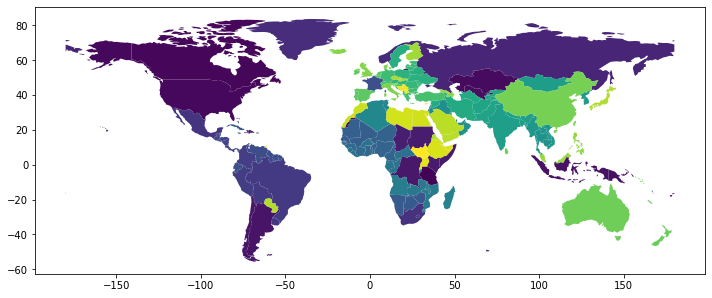

In [5]:
world = world[(world.pop_est>0) & (world.name!="Antarctica")]
world['gdp_per_cap'] = world.gdp_md_est / world.pop_est
world.plot(column='color', figsize=(12,12))

## ¿Can you paint the above map with a pre-defined number of color, for example *4*?
---


### Painting matrices

In [6]:
colors = [chr(27)+f"[0;{str(i)}m" for i in range(40, 47)]
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(30, 37)])
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(90, 98)])
colors.extend([chr(27)+f"[0;{str(i)}m" for i in range(100, 107)])

In [7]:
def color_matrix(n, colors_):
    marks = np.zeros((n, n))
    marks -= 1
    for i in range(n):
        for j in range(n):
            i_ = np.random.randint(len(colors_))
            marks[i, j] = i_

            while ((i > 0 and marks[i, j] == marks[i-1, j]) or
                (i < n-1 and marks[i, j] == marks[i+1, j]) or
                (j > 0 and marks[i, j] == marks[i, j-1]) or
                (j < n-1 and marks[i, j] == marks[i, j+1])):
                i_ = np.random.randint(len(colors_))
                marks[i, j] = i_

            print(f"{colors_[i_]} {i_} ", end='')
        print()

In [8]:
number_of_colors = 4
size_of_the_matrix = 10
color_matrix(size_of_the_matrix,
             colors[:number_of_colors])

 3  2  3  1  0  2  0  1  2  0 
 2  1  0  3  2  0  2  0  1  2 
 1  2  1  2  3  1  0  2  3  1 
 2  1  0  1  2  3  2  3  0  3 
 0  2  3  0  3  0  1  0  2  0 
 3  0  2  1  0  2  3  2  0  1 
 0  1  3  0  1  3  0  3  2  0 
 2  0  2  3  2  0  2  1  3  1 
 3  1  0  2  0  1  3  2  0  3 
 1  3  2  3  1  3  1  3  2  0 


## Painting graphs

In [26]:
import numpy as np
import random
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import IPython


def euclidean_distance(p1, p2):
    return np.sqrt((p1.x - p2.x) - (p1.y - p2.y))


def get_countries():
    path = 'naturalearth_lowres'
    countries = geopandas.read_file(geopandas.datasets.get_path(path))
    countries['color'] = [i+1 for i in range(countries.shape[0])]
    countries['pop_est'].astype(float)
    return countries


def add_countries_as_nodes(G, countries, n):
    H = G.copy()
    country_indexes =[]
    country_names = [i for i in range(countries.shape[0])]
    for i in range(n):
        country = np.random.choice(country_names)
        country_indexes.append(country)
    print(len(country_indexes))
    H.add_nodes_from(country_indexes)
    return H


def add_relations(G, n):
    if n <= 2:
        n = 5
    H = G.copy()
    country_relations = []
    for i in range(n):
        v1 = np.random.choice(H.nodes)
        v2 = np.random.choice(H.nodes)
        while v1 == v2:
            v2 = np.random.choice(H.nodes)
        country_relations.append((v1, v2))

    print(len(country_relations))
    H.add_edges_from(country_relations)
    return H


# def get_nodes_colors():

def get_neighborhoods(k, adj_dict, main_ones):
    ls_ = [i for i in main_ones]
    for neigh_i in main_ones:
        if neigh_i == k: continue
        if neigh_i not in ls_:
                ls_.append(neigh_i)
        for neigh_j in adj_dict[neigh_i].keys():
            if neigh_j == k: continue
            if neigh_j not in ls_:
                ls_.append(neigh_j)
                
    return ls_


def get_colors(G):
    nodes = list(G.nodes)
    nodes_degress = sorted(list(G.degree()),
                           key=lambda x: x[1])
    colors_nodes = []
    adj_dict = dict(G.adjacency())

    for node_, degree_ in nodes_degress:
        if node_ not in nodes:
            continue
        nodes.remove(node_)
        colors = []
        colors.append(node_)
        neighborhoods = get_neighborhoods(node_, adj_dict,
                                          adj_dict[node_].keys())
        for node_temp in nodes:
            if node_temp in neighborhoods:
                continue
            nodes.remove(node_temp)
            colors.append(node_temp)
        colors_nodes.append(colors)

    return colors_nodes


def draw_graph(G):
    plt.figure(figsize=(15, 15))
    pos = nx.spring_layout(G)
    r = lambda: random.randint(0, 0xFFFFFF)
    colors = []
    colors_nodes = get_colors(G)
    for i in range(len(colors_nodes)):
        color = '#%06X' % r()
        colors.append(color)
        nx.draw_networkx_nodes(H1, pos,
                            nodelist=colors_nodes[i],
                            node_color=color,
                            node_size=3000, alpha=0.8)

    labels={}
    for node in H1.nodes():
        labels[node] = countries.loc[node, 'name']

    nx.draw_networkx_edges(H1, pos, width=2, alpha=0.8, edge_color='k')
    nx.draw_networkx_labels(H1, pos, labels, font_size=12)

    print(f"Colors relations: {colors_nodes}")
    print(f"Hex colors: {colors}")
    # plt.axis('off')
    plt.show()

In [27]:
countries = get_countries()
print(countries.shape)
countries.head(2)

(177, 7)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,color
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",1
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",2


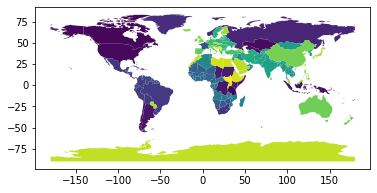

In [28]:
countries.plot(column='color')

8
20
Nodes ids: [117, 163, 73, 107, 162, 47, 92, 103]
Nodes namess: ['Romania', 'Egypt', 'eSwatini', 'Iran', 'Morocco', 'Cuba', 'Laos', 'Afghanistan']
Nodes edges: []
Colors relations: [[117, 73], [92], [107], [162], [47], [103], [163]]
Hex colors: ['#FF28FA', '#CF5B12', '#C12623', '#E3254A', '#57878C', '#570FE3', '#7578C3']


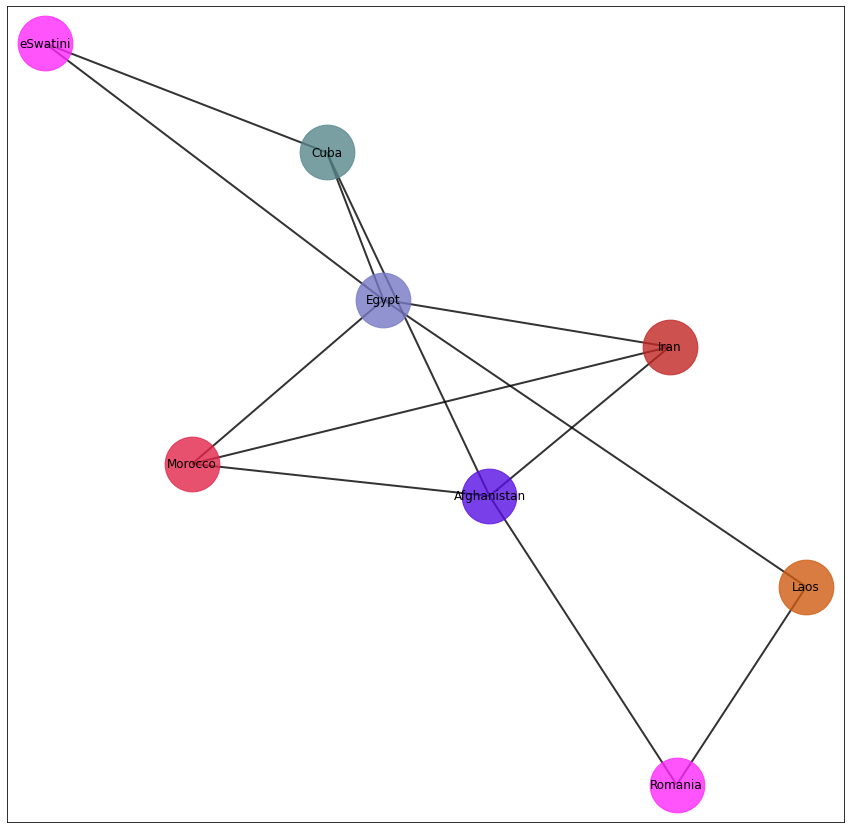

In [29]:
number_nodes = 8
number_edges = 20

G = nx.Graph()


H = add_countries_as_nodes(G, countries, number_nodes)
names = [countries.loc[i, 'name'] for i in H.nodes]
H1 = add_relations(H, number_edges)
print(f"Nodes ids: {H.nodes}")
print(f"Nodes namess: {names}")
print(f"Nodes edges: {H.edges}")
draw_graph(H1)